In [4]:
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt



In [6]:
# Загрузка стоп-слов и инициализация лемматизатора
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kondr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kondr\AppData\Roaming\nltk_data...


In [21]:
# Удалим пунктуацию, приведем к нижнему регистру, лемматизируем и удалим стоп-слова
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

def visualize_top_words(filename, title):
    print(f"Processing the song: {title}\n")

    with open(filename, 'r') as f:
        song = f.read()
    print("Original text:\n", song[:200], "...")  # начало текста

    processed_song = preprocess_text(song)
    print("\nProcessed text:\n", processed_song[:200], "...")  # начало обработанного текста

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([processed_song])

    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_values = tfidf_matrix.toarray()[0]
    tfidf_dict = dict(zip(feature_names, tfidf_values))

    sorted_tfidf = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
    print("\nTop 5 words by TF-IDF:")
    for word, value in sorted_tfidf[:5]:
        print(word, ":", value)

    plt.figure(figsize=(15, 10))
    top_n = 20
    words = [item[0] for item in sorted_tfidf[:top_n]]
    values = [item[1] for item in sorted_tfidf[:top_n]]

    plt.barh(words, values, color='skyblue')
    plt.xlabel('TF-IDF Value')
    plt.title(f'Top Words by TF-IDF for "{title}"')
    plt.gca().invert_yaxis()
    plt.show()

Processing the song: I Came to Party

Original text:
 I thought I told ya, I came to party. 

[Deuce]: 
Hey bar tender, can I get a cup? 
Tonight's my night and I'm gettin' fucked up. 
I hope I still got the charm, got the luck, 
'Cause all these bitches ...

Processed text:
 thought told ya came party deuce hey bar tender get cup tonight night im gettin fucked hope still got charm got luck cause bitch ho look like much fun travie mccoy stepped club feelin self like braill ...

Top 5 words by TF-IDF:
party : 0.45601459270045336
came : 0.4080130566267214
sip : 0.3840122885898554
girl : 0.2880092164423916
cause : 0.1920061442949277


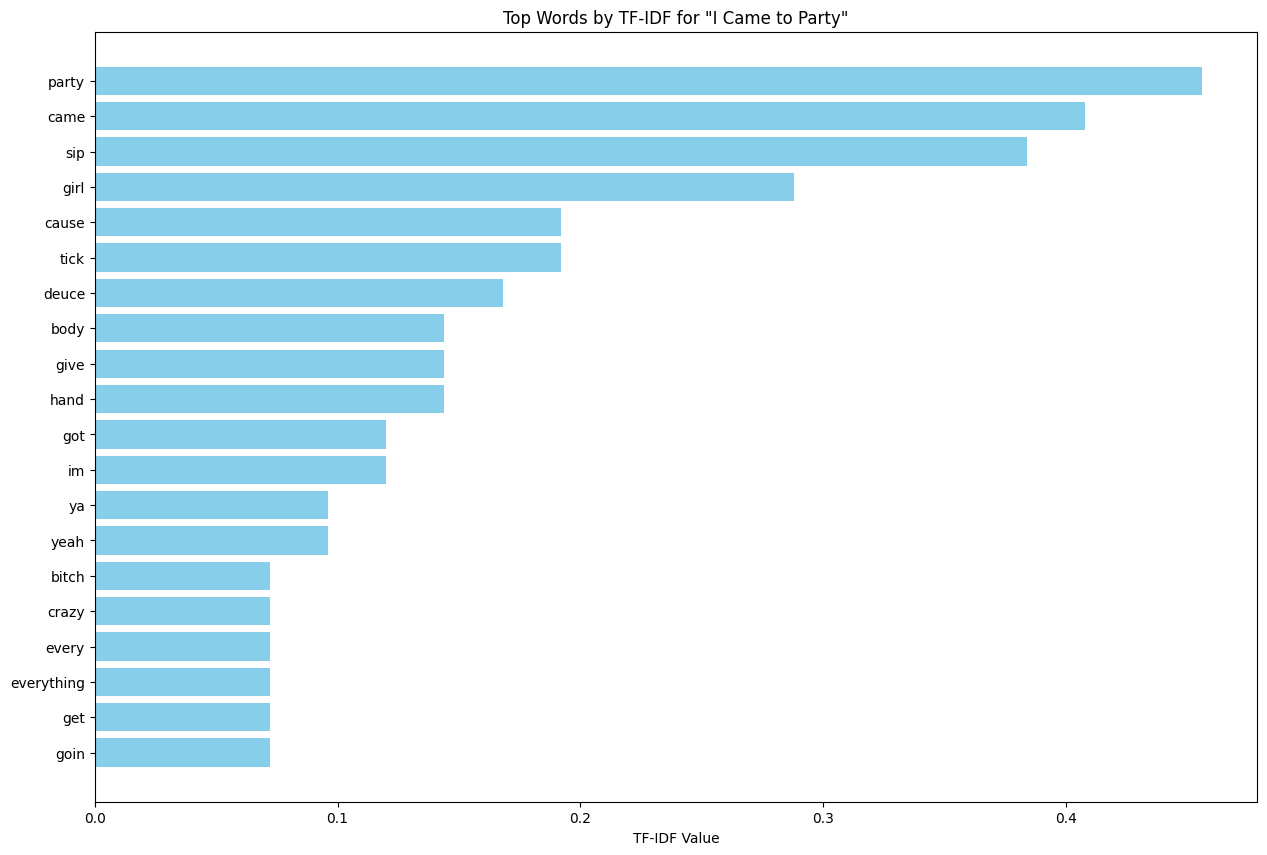

In [22]:
visualize_top_words('Deuce_I_Came_to_Party.txt', 'I Came to Party')

Processing the song: The one

Original text:
 I'm supposed to be the one who brings us all together
Weak or strong, not just a song
We sing along when things go wrong
You will need me when you fall
And I will need you when I'm wrong
Tears lead me ...

Processed text:
 im supposed one brings u together weak strong song sing along thing go wrong need fall need im wrong tear lead let lead far weak strong ill hold arm see sickness sign dead weight line like sickness mi ...

Top 5 words by TF-IDF:
im : 0.2994763741177399
go : 0.2695287367059659
need : 0.2695287367059659
wrong : 0.2695287367059659
lead : 0.2395810992941919


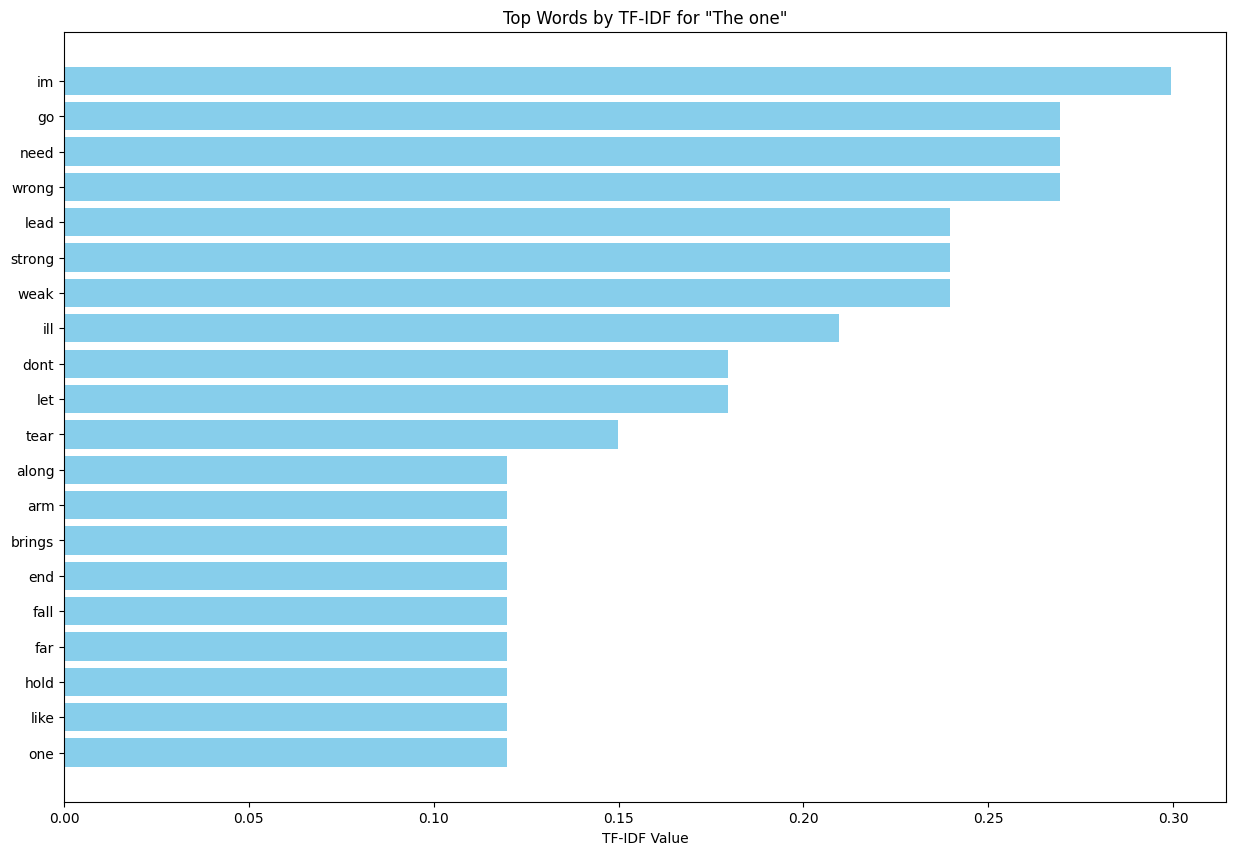

In [23]:
visualize_top_words('Deuce_The_one.txt', 'The one')

Processing the song: Undead

Original text:
 Undead

Undead!
Undead!
Undead!
Undead!

(Undead!)
You better get up out the way,
Tomorrow we'll rise so we fight today,
And no, I don't give a fuck what you think and say,
'Cause we are gonna rock th ...

Processed text:
 undead undead undead undead undead undead better get way tomorrow well rise fight today dont give fuck think say cause gonna rock whole place anyway undead better get way tomorrow well rise fight toda ...

Top 5 words by TF-IDF:
undead : 0.33925445938390814
cause : 0.23947373603569985
dont : 0.23947373603569985
fuck : 0.23947373603569985
get : 0.23947373603569985


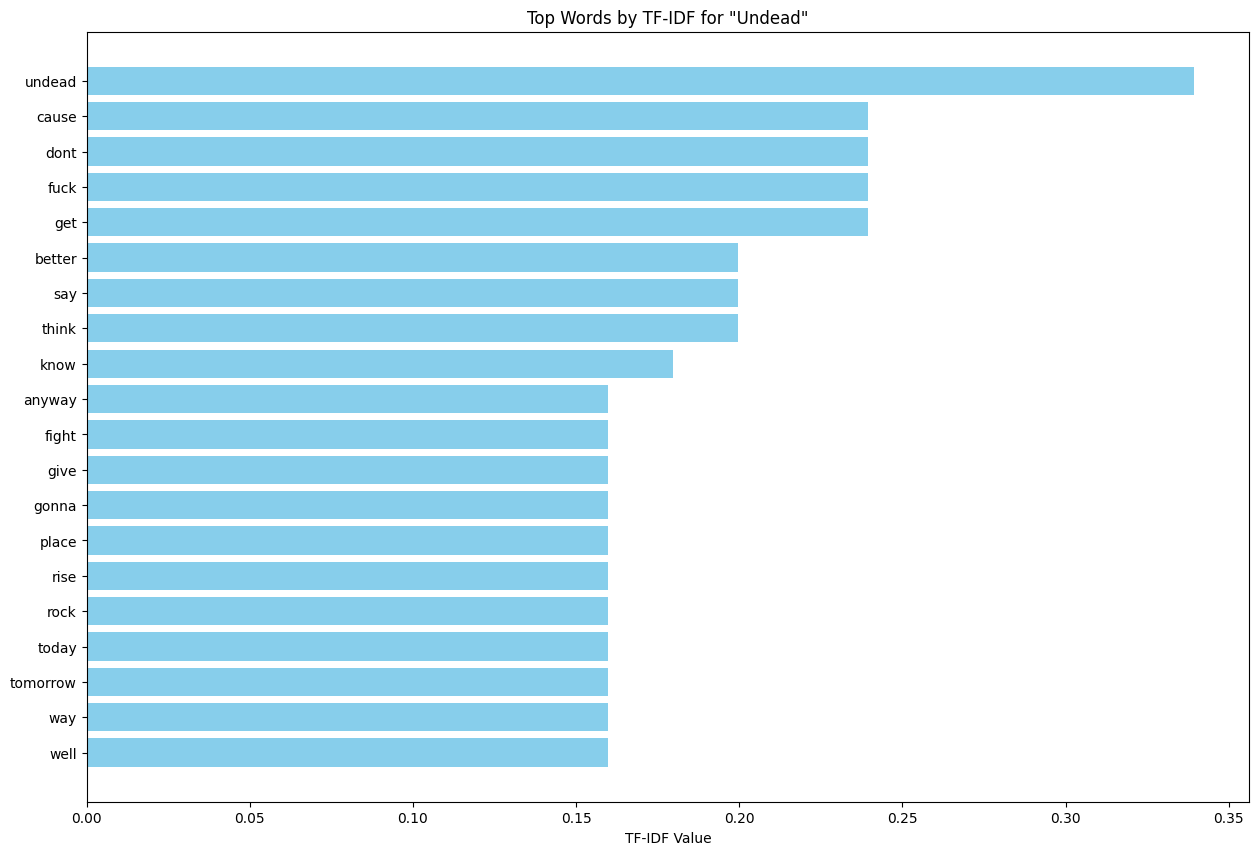

In [24]:
visualize_top_words('Undead_Hollywood_Undead.txt', 'Undead')